In [10]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
matplotlib.rcParams['figure.figsize']=(20,10)

In [11]:
#1) Reading the csv file
df1=pd.read_csv("bengaluru_house_prices.csv")
df1.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [12]:
df1.shape #(rows,columns) available in data

(13320, 9)

In [13]:
df1.groupby('area_type')['area_type'].agg('count')#This will show all the area_types and there total from  "area_type" column

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# 2) IMP PART Cleaning the DATA
## So as we know for assumming the finale price we dont need such columns like:
1) availability
2) society
3) area_type
4) balcony
##### so we are going to drop this columns and will store our new dataframes in another variable

In [14]:
#Step2)
df2=df1.drop(['area_type','availability','society','balcony'],axis = 'columns')
df2.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00



## Now Cleaning the data(Handling NA values )

In [15]:
#Finding out how many values are null in my data
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Now We can drop the NA rows. But also you can find out the median of that particular row and can fill NA values with your Average Median Answer also you can use ffill()

In [16]:
df3=df2.dropna()#Droping Null Rows
df3.isnull().sum()#Rechecking that is there any null value still available

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
df3['size'].unique()#Now Solving and managing 'size' column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

as we know that here in column of size bhk = bedroom so for solwing this problem we will do operations as follow
1) we will make new column name "BHK"
2) And the will store 'size' columns values in our new column 'BHK'
3) then will delete the space between bhk and its number . Ex 3 bhk , by using lambda function
4) Then will convert that string into integer
5) then will get 0th element as its bhk or bedroom size

In [18]:
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) #Deleting "space" between number and bhk . and making new column and storing our new values in it


/var/folders/r3/gl6nd53s6ggfw1k41k_33lb40000gn/T/ipykernel_2554/2157758152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) #Deleting "space" between number and bhk . and making new column and storing our new values in it


In [19]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [20]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [21]:
df3[df3.BHK==43] #here this is an error where we get that 43 bhk house cannot be in 2400sqft , so this data is false then we will drop this row
#

,location,size,total_sqft,bath,price,BHK
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [22]:
df3.total_sqft.unique()#Finding more errors in our data  column by column

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

# So here '1133-1384' is like the type of range so we are now plotting all the ranges from the data.


In [23]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
df3[~df3["total_sqft"].apply(is_float)]#this will apply our UserFunction we made to detect that the "total_sqft" are float or not
#if it is not a float then it will return all ranges available in "total_sqft"

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


Now Making new function to Convert those ranges into average.

In [25]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [26]:
convert_sqft_to_num('3300-900')#Testing Our Function

2100.0

In [27]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)#Making new column and then Applying my function on it .

In [28]:
df4.total_sqft.unique()#To check whether any "-" range remained or if any Error remained

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [29]:
df5= df4.copy()

# Now time to check other columns such as "price" 
But since we get to know that the prices are Not accurate as per/sqft
1) Price is counted in Formula = price/total square fit
2) so now making mathematics implimentation to get accurate prices of the Area

In [30]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft'] #Equation for new column 'price_per_sqft'

In [31]:
df5.head(4)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861


# Now looking out errors and fixing for column such as 'location'
1) Now analysing 'location' column

In [32]:
df5['location'].shape #Shape will just only discover total number of rows in perticular mentioned column name such as 'location'
#

(13246,)

In [33]:
len(df5.location.unique()) #Here the total unique data.

1304

In [34]:
df5.location.unique() #Here the total unique data.

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

So 1304 locations are the actually big number so we cannot use labelEncoder to label them as in number or we cannot to One Hot Encodding Technique for this kinds of problems

In this Many of the locations have only 1 or 2 data points but how can we find it lets do some analytics for finding them.Basically we are finding how many data points are for each Location

In [35]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count')
location_stats
#This shit of code is making groupby() with entity 'location' and Grouping its DataPoints together and storing it in new column name ['location']
#After that it is counting Total Datapoints on each Location with the function called .agg('count')

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

#Here we got to know that Whitefield has 535 points which is good and it keeps in low 

In [36]:
 #So we came to know that Location less than 10 are Others location
len(location_stats[location_stats<=10])#This Conditional Statements will find that data points which have location less than 10

1052

In [37]:
locations_less_than_10 = location_stats[location_stats<=10]
locations_less_than_10 

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [38]:
len(df5.location.unique())

1293

In [39]:
 df5.location = df5.location.apply(lambda x:'other' if x in locations_less_than_10 else x) #My this line of code will store all the Values of location as a 'Other' which are having "location_less_than_10" that means that locations which are having datapoints less that 10  


In [40]:
len(df5.location.unique()) #Now again sorting the data and checking Unique() again 

242

Hence it is sorted now again

 # 3) Outlier Removal (Removing Some Errors which are not appropriate to fit in our data)
 Video number 4
 ### Erros:
 1) Here , the 1 bedroom can be the size of mostly 300sqft so, 2 bedrooms = 600sqft ok!
 2) Then Maybe less that 300 sqft bedrooms data can be fake or maybe entered incorrectly,we will directly remove this fake datas
 3) 

In [41]:
df5[df5.total_sqft/df5.BHK<300] #Checking whether how many rows in df5 are having 'total_sqft'/'BHK' is less than 300.

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [42]:
df5.shape

(13246, 7)

In [43]:
df6 = df5[~(df5.total_sqft/df5.BHK<300)]#We Normally Niglate that Rows which are Having 1 Bedroom less than 300
df6.shape

(12502, 7)

In [44]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we analysed that Min Price in "price_per_sqft" is 267 which i dont think that Banglore have this much low price so lets check it out

In [45]:
 df6[df6.price_per_sqft<=500]#This Statement will show us the all datas which are having prices less than 300 per sqft

,location,size,total_sqft,bath,price,BHK,price_per_sqft
674,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371.428571
1894,other,3 Bedroom,52272.0,2.0,140.0,3,267.829813
5393,other,9 BHK,42000.0,8.0,175.0,9,416.666667
11748,Begur,3 BHK,2400.0,3.0,12.0,3,500.000000


#### So for removing such types of Errors we will write a function which will calculate standard deviation and will detect error

In [46]:
def remove_price_per_sqft_outliers(df):#Taking input as a dataframe
    df_out = pd.DataFrame()#Making output as Dataframe
    for key, subdf in df.groupby('location'):#Making Groups with entity location with the help of python for loop for temperory operations such as mean , sd
        mean = np.mean(subdf.price_per_sqft)#calculating Mean of my column
        standard_deviation = np.std(subdf.price_per_sqft) #calculating STD of my column
        reduced_df = subdf[(subdf.price_per_sqft>(mean-standard_deviation)) & (subdf.price_per_sqft<=(mean+standard_deviation))]#Storing Only that values in 'reduced_df' which are beyond the standard deviation. (simply anything above mean-std and anything below mean+std)
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [47]:
df7 = remove_price_per_sqft_outliers(df6)
df7

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


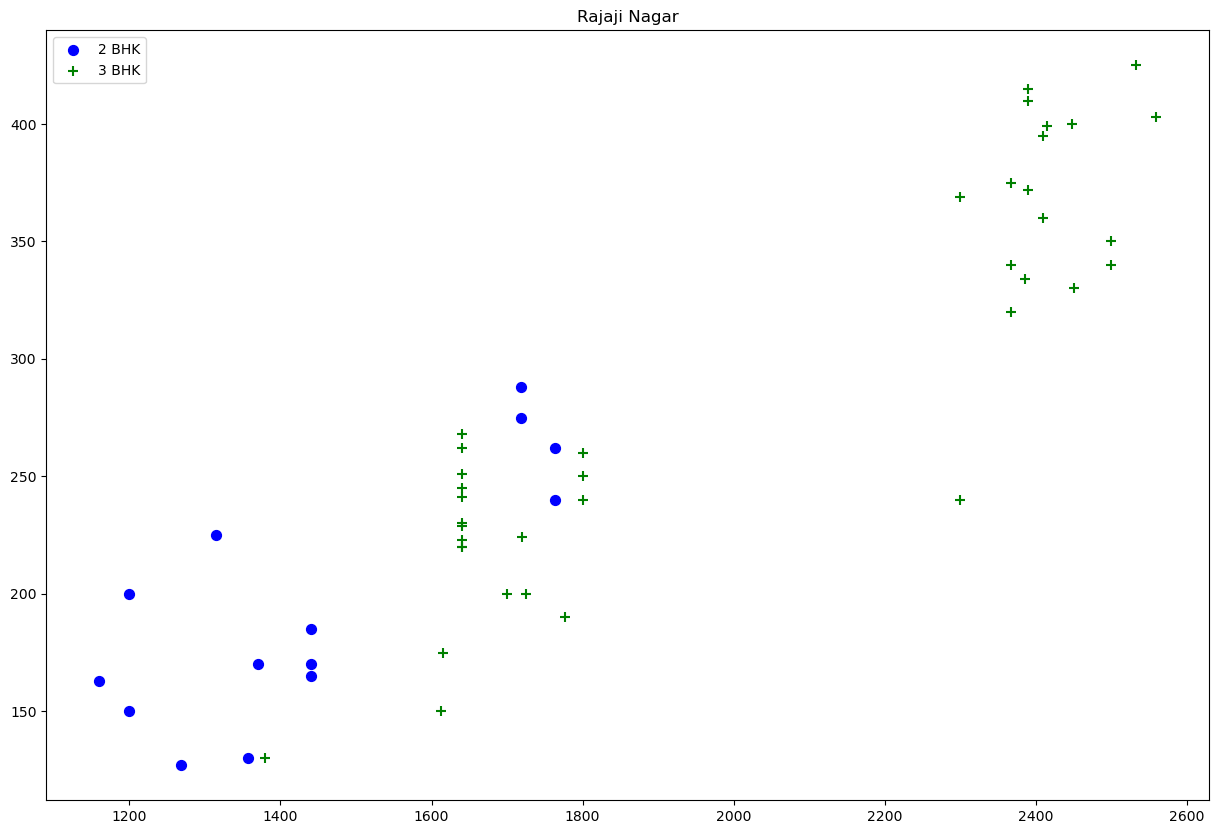

In [48]:
#Function for Visualising Our data of Location which have 2 and 3 BHK
def plot_scatter_chart(df,location): 
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [49]:
#This Function will sort the price of the all BHK and suppose if the 2BHK flats pricess will not be greater than the 3BHK flat prices

In [50]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])#Excling as a array
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()


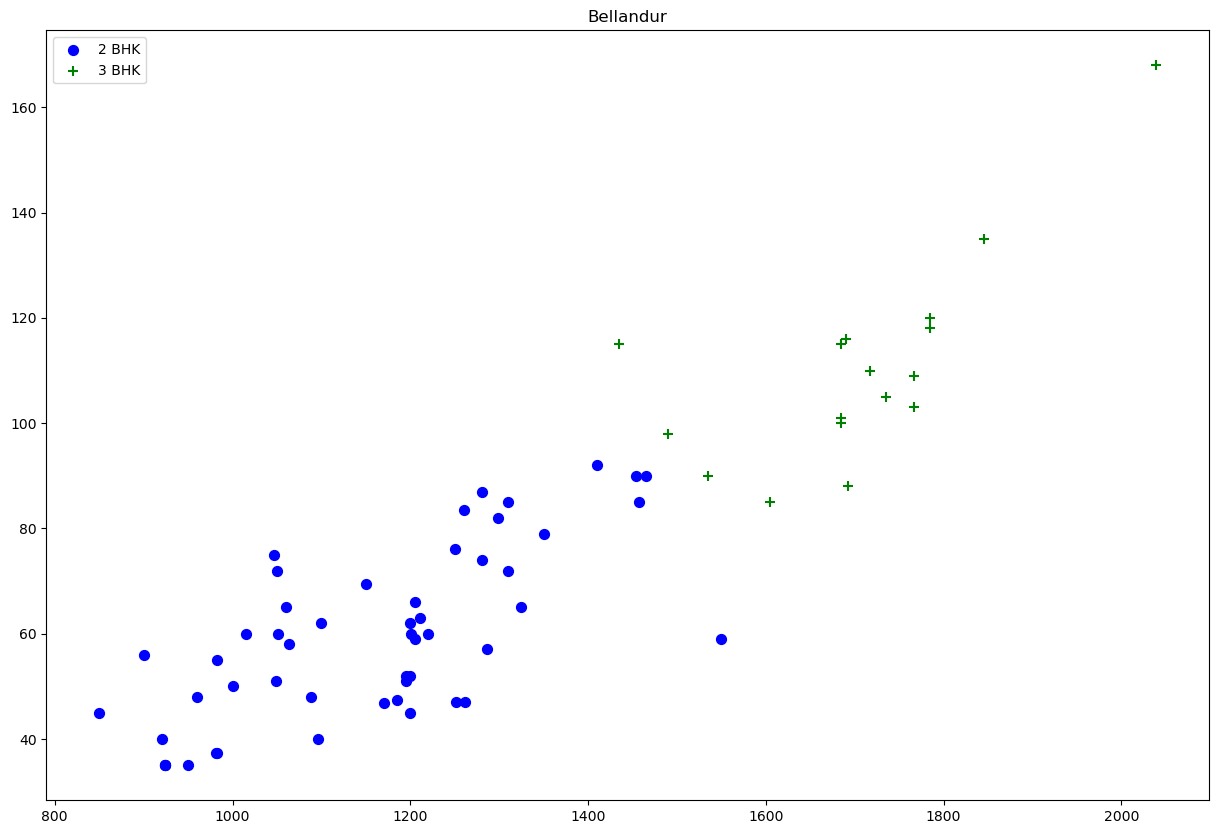

In [51]:
plot_scatter_chart(df8,'Bellandur')

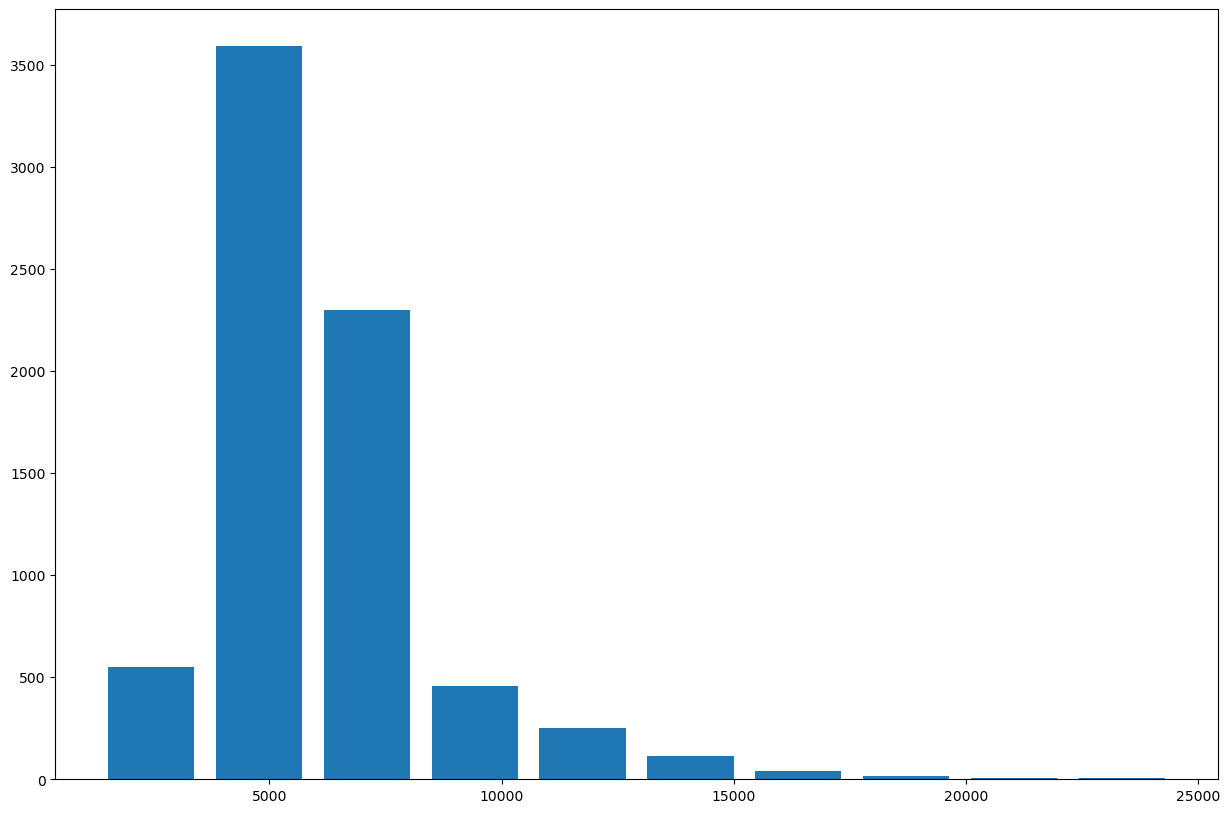

In [52]:
 #Now Watching that in which 
import matplotlib
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel="Prices"
plt.ylabel="count"

In [53]:
 df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [54]:
df8[df8.bath>df8.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [55]:
df9 = df8[df8.bath<df8.BHK+2]
df9.shape

(7251, 7)

In [56]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')

In [57]:
df10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# Important Part
# Now Building Model with Machine Learning Techniques and Algorithms
1) To Convert Text into Numbers we will use OneHotEncoding Technique by using Pandas 'get_dummies()' function.
2) We will concatinaten our main dataframe and dummies frame
3) We will drop Any 1 columns from dummies variable and 1 column from our dataframe as the OneHotEncoding rule says to us.
4) Then we will analyse the Dependeble varibales and independent variables and will store them in X and y.
5) Then we will import "train_test_split" and will full fill its values.
6) Here we are going to use Linear Regression as because we already have the data sets and variables

In [58]:
import pandas as pd
dummies = pd.get_dummies(df10.location)# 1)Getting dummy columns with the help of Pandas

In [59]:
df11 = pd.concat([df10,dummies.drop('other',axis="columns")],axis='columns') #2) Concatinating both frames and droping one column from 'dummies' as it is the rule of OneHotCoding
df11.head(3)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
#3) droping one more column from df and storing it in another df
df12 = df11.drop("location",axis = 'columns')

In [61]:
df12.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
#4) Defining Dependent and Independent Variables
X = df12.drop('price',axis = 'columns')#All Indepenent Variable stored in X after droping 'price'
y = df12.price#Own price is the dependable variable

In [71]:
#5) Importing cross-validation Model from sci-kit Learn to detect which Model will be good fit
# Aslo importing all Algorithms of Regressions from Sci-kit learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit #SuffleSplit will randomise my all samples so that the data can get good learn

# Hyper-Para-Meter Tunning
##### -> With the help of GridSearchCV()
1) We will make a function for GridSearchCV which will taking input a function name and it will calculate with all ur Entered Parameters
2) 

In [145]:
#6) Hyper-Para-Meter Tunning With Grid SearchCV to Comeout which Model best fits and gives best score
def find_best_params_using_grid_search(X,y):
    #We are adding Dictionary in the function
    algos={
        'linear_regression' : {
            'model': LinearRegression(),
            'params':{
              "fit_intercept": [True, False],
             }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['random','best']
            }
        }
        
    }
        
    scores=[] # Assigning Empty Array which will store the values in it
    cv = ShuffleSplit(n_splits=4,test_size=.2,random_state=0) #creating Cross_validation with Shuffle and Splits. 
    for model , params in algos.items(): #Running For Loop to a Dictionary . Selecting "Model and Params from algos.item"
        gs = GridSearchCV(params['model'],params['params'],cv=cv,return_train_score=False)#Applying GridSearchCV "gs = GridSearchCV(model,parameters,cv,returnscore)"
        gs.fit(X,y)#fitting in GridSearch
        scores.append({#Adding All the Values in Score Array
        'model':model,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
                    })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])#Returning Score and its all appended Columns in A form of DataFrame
find_best_params_using_grid_search(X,y)#calling Function

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
8 fits failed out of a total of 16.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", li

,model,best_score,best_params
0,linear_regression,0.814646,{'fit_intercept': False}
1,lasso,0.681782,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.705183,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


# Linear Regression has the best Score in compare to all others
1) So Lets train and test and fit the model with Linear Regression

In [146]:
#7) Using Model Selection for importing train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 10)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)


0.8452277697874384

In [154]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [151]:
def predict_price(location,sqft,bath,bhk):   #Taking Input as Location,Sqft,,bathroom,bhk 
    loc_index = np.where(X.columns==location)[0][0]#this line will tell us the Index of the Location. On Which Index it is located in Data
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [152]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677207957

In [155]:
# Exporting Model in The File with the help of Pickle

In [153]:
import pickle
with open('bangalore_home_price_prediction','wb') as file:
    pickle.dump(lr,file)

In [156]:

import json
columns = {'data_columns' : [col.lower() for col in X.columns]}#we Converted all the columns in lower case first with for loop
#then again we will dump all of them in json file
with open("columns.json","w") as f:
    f.write(json.dumps(columns))